In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
import numpy as np
import string as str
from datetime import datetime


In [58]:
debit = pd.read_csv('Checking1.csv', names=['Date', 'Cost', 'Unknown', 'Unnamed', 'DebitCardUse'])
debit1 = pd.read_csv('Checking1 (1).csv', names=['Date', 'Cost', 'Unknown', 'Unnamed', 'DebitCardUse'])

In [60]:
#credit = pd.read_csv('CreditCard3.csv', names=['Date', 'Cost', 'Unknown','Unnamed','CreditCardUse'])
debit

,Date,Cost,Unknown,Unnamed,DebitCardUse
0,05/02/2019,-7.71,*,NaN,PURCHASE AUTHORIZED ON 05/01 #11 BIG MAMAS & P...
1,05/02/2019,-4.50,*,NaN,PURCHASE AUTHORIZED ON 05/01 SQ *BOBA LOCA FRE...
2,05/01/2019,-8.88,*,NaN,ZELLE TO ASPATURIAN RACHAEL ON 05/01 REF #PP06...
3,05/01/2019,-21.88,*,NaN,PURCHASE AUTHORIZED ON 05/01 TJMAXX #0 663 FOO...
4,05/01/2019,-24.50,*,NaN,PURCHASE AUTHORIZED ON 04/29 SYLVIA MOESTL VAS...
5,04/30/2019,-9.43,*,NaN,PURCHASE AUTHORIZED ON 04/29 LYFT *RIDE MON 2 ...
6,04/30/2019,22.00,*,NaN,VENMO CASHOUT 2006533149 JAIMIE CHOI
7,04/29/2019,-8.26,*,NaN,VENMO PAYMENT 2001553654 JAIMIE CHOI
8,04/29/2019,-25.03,*,NaN,PURCHASE AUTHORIZED ON 04/28 CHEVRON/PWI 807 F...
9,04/29/2019,-7.98,*,NaN,PURCHASE AUTHORIZED ON 04/27 SMITHS FO 20 N. B...


In [61]:
#debit=debit.drop(['Unknown', 'Unnamed'], axis=1)
#debit1=debit1.drop(['Unknown', 'Unnamed'], axis=1)
#credit=credit.drop(['Unnamed','Unknown'], axis=1)

In [62]:

def purchase(c):
    if c['Cost'] < 0 :
        return 1
    else:
        return 0
debit['Purchase'] = debit.apply(purchase, axis = 1)
debit1['Purchase'] = debit1.apply(purchase, axis =1)

#debit1['Purchase']=0
#pattern = re.compile(r'^PURCHASE AUTHORIZED*')
#for i in debit1['DebitCardUse']:
#    if pattern.search(i):
#        index = debit1.loc[debit1['DebitCardUse'] == i].index[0]
#        debit1.iloc[index, debit1.columns.get_loc('Purchase')] = 1

In [63]:
debit['State']=debit['DebitCardUse'].str.extract('((?<=\s)[A-Z][A-Z](?=\s[A-Z]\d+))')
debit['City']=debit['DebitCardUse'].str.extract('((SAINT\s|SALT LAKE\s|LA\s)?[A-Z]*(?=\s[A-Z][A-Z]\s[A-Z]\d+))')[0]
debit['Stores']=debit['DebitCardUse'].str.extract('((?<=PURCHASE AUTHORIZED ON\s\d\d/\d\d\s)(#)?\w+.+?\w+\s\w+\s)')[0]
debit['App']=debit['DebitCardUse'].str.extract('(^\w+\s\w+)')

debit1['State']=debit1['DebitCardUse'].str.extract('((?<=\s)[A-Z][A-Z](?=\s[A-Z]\d+))')
debit1['City']=debit1['DebitCardUse'].str.extract('((SAINT\s|SALT LAKE\s|LA\s)?[A-Z]*(?=\s[A-Z][A-Z]\s[A-Z]\d+))')[0]
debit1['Stores']=debit1['DebitCardUse'].str.extract('((?<=PURCHASE AUTHORIZED ON\s\d\d/\d\d\s)(#)?\w+.+?\w+\s\w+\s)')[0]
debit1['App'] = debit1['DebitCardUse'].str.extract('(^\w+\s\w+)')

def app(c):
    if pd.notnull(c['Stores']):
        return np.nan
    else:
        return c['App']
    
debit['App'] = debit.apply(app, axis = 1)
debit1['App'] = debit1.apply(app, axis =1)

In [64]:
debit

,Date,Cost,Unknown,Unnamed,DebitCardUse,Purchase,State,City,Stores,App
0,05/02/2019,-7.71,*,NaN,PURCHASE AUTHORIZED ON 05/01 #11 BIG MAMAS & P...,1,CA,MONTROSE,#11 BIG MAMAS,NaN
1,05/02/2019,-4.50,*,NaN,PURCHASE AUTHORIZED ON 05/01 SQ *BOBA LOCA FRE...,1,CA,MONTROSE,SQ *BOBA LOCA,NaN
2,05/01/2019,-8.88,*,NaN,ZELLE TO ASPATURIAN RACHAEL ON 05/01 REF #PP06...,1,NaN,NaN,NaN,ZELLE TO
3,05/01/2019,-21.88,*,NaN,PURCHASE AUTHORIZED ON 05/01 TJMAXX #0 663 FOO...,1,CA,LA CANADA,TJMAXX #0 663,NaN
4,05/01/2019,-24.50,*,NaN,PURCHASE AUTHORIZED ON 04/29 SYLVIA MOESTL VAS...,1,CA,,SYLVIA MOESTL VASI,NaN
5,04/30/2019,-9.43,*,NaN,PURCHASE AUTHORIZED ON 04/29 LYFT *RIDE MON 2 ...,1,CA,,LYFT *RIDE MON,NaN
6,04/30/2019,22.00,*,NaN,VENMO CASHOUT 2006533149 JAIMIE CHOI,0,NaN,NaN,NaN,VENMO CASHOUT
7,04/29/2019,-8.26,*,NaN,VENMO PAYMENT 2001553654 JAIMIE CHOI,1,NaN,NaN,NaN,VENMO PAYMENT
8,04/29/2019,-25.03,*,NaN,PURCHASE AUTHORIZED ON 04/28 CHEVRON/PWI 807 F...,1,UT,FILLMORE,CHEVRON/PWI 807,NaN
9,04/29/2019,-7.98,*,NaN,PURCHASE AUTHORIZED ON 04/27 SMITHS FO 20 N. B...,1,UT,SAINT GEORGE,SMITHS FO 20,NaN


In [65]:
debit= debit.drop('DebitCardUse', axis=1)
debit1= debit1.drop('DebitCardUse', axis=1)

In [66]:
debit.to_csv('Debit_Edited')
debit1.to_csv('Debit_Edited1')

In [67]:
#credit['State']=credit['CreditCardUse'].str.extract('([A-Z][A-Z]$)')
#credit['City']=credit['CreditCardUse'].str.extract('([A-Z]+(?=\s[A-Z][A-Z]$))')
#credit['Stores']=credit['CreditCardUse'].str.extract('(^\w+.\w+(\sPAYMENT)?)')[0]

In [68]:
#credit=credit.drop('CreditCardUse', axis=1)

In [69]:
#credit.to_csv('Credit_Edited')

In [70]:
merge1 = pd.read_csv('Debit_Edited')
merge2 = pd.read_csv('Debit_Edited1')

In [71]:
merge = merge1.append(merge2)

In [72]:
#merge= merge.drop('Unnamed: 0', axis=1)
merge=merge.drop_duplicates()

In [73]:
merge.to_csv('Debit_Full')

In [74]:
credit = pd.read_csv('Credit_Edited')
merge = pd.read_csv('Debit_Full', index_col = 0)

In [75]:
#credit = credit.drop('Unnamed: 0', axis=1)

In [76]:
credit['Credit_Purchase']=1
pattern = re.compile(r'PAYMENT*')
purch_index= []
for i in credit['Stores']:
    if pattern.search(i):
        purch_index.extend(credit.loc[credit['Stores'] == i].index)
purch_index = list(set(purch_index))
for i in purch_index:
    credit.iloc[i, credit.columns.get_loc('Credit_Purchase')] = 0

In [77]:
#credit.to_csv('Credit_Edited')
merge['Date']= pd.to_datetime(merge['Date'])
merge = merge.sort_values(by=['Date'])

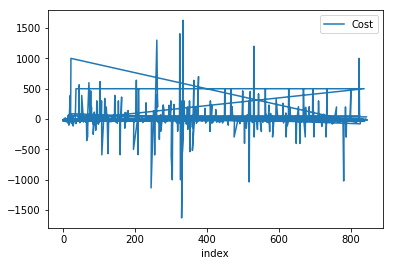

In [78]:
merge.reset_index().plot(x = 'index', y = 'Cost')

In [79]:
merge = merge.reset_index(drop=True)

In [80]:
merge['Cost'].min()

-1628.0

In [81]:
merge.to_csv('Debit_Full')

In [82]:
hi

NameError: name 'hi' is not defined

In [83]:
merge

,Unnamed: 0.1,Date,Cost,Unknown,Unnamed,Purchase,State,City,Stores,App
0,45,2017-11-09,-17.53,*,NaN,1,UT,PROVO,ASIAN MARKET PROVO,NaN
1,846,2017-11-09,-11.00,*,NaN,1,NaN,NaN,NaN,VENMO PAYMENT
2,847,2017-11-09,-17.53,*,NaN,1,UT,PROVO,ASIAN MARKET PROVO,NaN
3,44,2017-11-09,-11.00,*,NaN,1,NaN,NaN,NaN,VENMO PAYMENT
4,845,2017-11-10,36.37,*,NaN,0,NaN,NaN,NaN,BRIGHAM YOUNG
5,43,2017-11-10,36.37,*,NaN,0,NaN,NaN,NaN,BRIGHAM YOUNG
6,40,2017-11-13,-14.82,*,NaN,1,UT,PROVO,CAFE 300 PROVO,NaN
7,839,2017-11-13,-37.42,*,NaN,1,NaN,NaN,NaN,QuestarGas QuestarGas
8,840,2017-11-13,-10.00,*,NaN,1,NaN,NaN,NaN,BYU CougarCash
9,841,2017-11-13,-7.17,*,NaN,1,UT,PROVO,BYU STORE PROVO,NaN
